<div class="">
<br><br>
<center><br><font size="15"><font face="Times New Roman"><strong>KECERDASAN BUATAN
<center><br><font size="5"><font face="calibri"><strong>Parkinson's Disease Classification by UCI Machine Learning
<br><br>
DISUSUN
<br><strong>Oleh :
<br>
<br><strong>BIMA PRATAMA ANOM
<br><strong>09011181722009
<br><br>
<br><strong>UJIAN AKHIR SEMESTER
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2019

## DATA SET INFORMATION

Data yang digunakan dalam penelitian ini dikumpulkan dari 188 pasien dengan PD (107 pria dan 81 wanita) dengan usia berkisar 33-87 (65,1 ± 10,9) di Departemen Neurologi di CerrahpaÅŸa Fakultas Kedokteran, Universitas Istanbul. Kelompok kontrol terdiri dari 64 individu sehat (23 pria dan 41 wanita) dengan usia bervariasi antara 41 dan 82 (61,1 ± 8,9). Selama proses pengumpulan data, mikrofon diatur ke 44,1 KHz dan setelah pemeriksaan dokter, fonasi vokal / a / yang berkelanjutan dikumpulkan dari setiap subjek dengan tiga kali pengulangan.

## IMPORT PACKAGES 
Berikut ini adalah paket-paket yang digunakan antara lain :

In [1]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
scaler = MinMaxScaler
import numpy as np
np.random.seed(7)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


## IMPORT DATASET
Dataset yang dugunakan dalam hal ini adalah Parkinson's Disease Classification by UCI.

In [2]:
df = pd.read_csv("C:/Users/User/Downloads/pd_speech_features.csv")

head() melihat data sebanyak n pada kolom awal (jika tidak diisi, akan tampil secara random).

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


Mengahapus baris pertama pada data set awal untuk menentukan fitur data set 

In [4]:
data = pd.read_csv('C:/Users/User/Downloads/pd_speech_features.csv', skiprows=1)
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
data.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [6]:
enc = LabelEncoder()
data = data.apply(enc.fit_transform)
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,678,438,538,76,73,620,317,169,...,23,96,242,329,425,350,36,82,430,1
1,0,1,193,354,481,70,67,645,265,149,...,20,202,571,569,562,525,368,344,521,1
2,0,1,669,291,566,68,65,653,206,134,...,24,65,458,534,561,380,80,107,238,1
3,1,0,60,669,574,25,23,737,461,276,...,283,199,340,568,364,370,281,337,194,1
4,1,0,43,672,459,72,69,636,626,303,...,393,342,374,439,519,557,416,286,303,1


In [7]:
data.shape

(756, 755)

Text(0.5, 0, 'class')

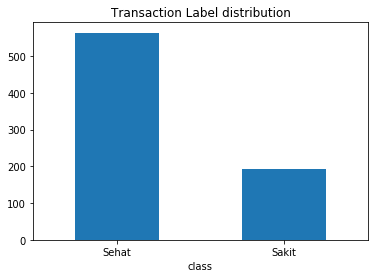

In [8]:
labels = ['Sehat','Sakit']
classes = pd.value_counts(data['class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Label distribution")
plt.xticks(range(2), labels)
plt.xlabel("class")


## FEATURE NORMALIZATION
Normalisasi adalah konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan (menjadi antara 0 dan 1).

Membagi Fitur dan tabel:

In [9]:
x = data.iloc[:,:754]
y = data.iloc[:,754]

In [10]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(x)
feature_scaled.shape

(756, 754)

In [11]:
label_categorical=to_categorical(y)
label_categorical.shape

(756, 2)

## SEQUENTIAL MODEL
Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=2)

In [13]:
model = Sequential()
model.add(Dense(units= 1000, input_dim =754, activation='relu'))
model.add(Dense(units= 1000, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

In [14]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, 
                         epochs=100)

Train on 680 samples, validate on 76 samples
Epoch 1/100
680/680 [==============================] - 1s 2ms/step - loss: 278.5341 - accuracy: 0.6662 - val_loss: 32.4955 - val_accuracy: 0.6184
Epoch 2/100
680/680 [==============================] - 1s 2ms/step - loss: 31.2180 - accuracy: 0.7162 - val_loss: 14.6293 - val_accuracy: 0.8289
Epoch 3/100
680/680 [==============================] - 1s 2ms/step - loss: 16.6843 - accuracy: 0.7647 - val_loss: 4.0961 - val_accuracy: 0.7368
Epoch 4/100
680/680 [==============================] - 1s 2ms/step - loss: 2.9949 - accuracy: 0.8103 - val_loss: 2.2716 - val_accuracy: 0.8026
Epoch 5/100
680/680 [==============================] - 1s 2ms/step - loss: 1.2814 - accuracy: 0.8353 - val_loss: 2.3439 - val_accuracy: 0.7500
Epoch 6/100
680/680 [==============================] - 1s 2ms/step - loss: 0.9684 - accuracy: 0.8676 - val_loss: 0.9699 - val_accuracy: 0.8684
Epoch 7/100
680/680 [==============================] - 1s 2ms/step - loss: 0.5011 - accurac

680/680 [==============================] - 1s 1ms/step - loss: 1.0942e-04 - accuracy: 1.0000 - val_loss: 0.4538 - val_accuracy: 0.9211
Epoch 58/100
680/680 [==============================] - 1s 1ms/step - loss: 1.0550e-04 - accuracy: 1.0000 - val_loss: 0.4536 - val_accuracy: 0.9211
Epoch 59/100
680/680 [==============================] - 1s 1ms/step - loss: 1.0314e-04 - accuracy: 1.0000 - val_loss: 0.4533 - val_accuracy: 0.9211
Epoch 60/100
680/680 [==============================] - 1s 1ms/step - loss: 9.9986e-05 - accuracy: 1.0000 - val_loss: 0.4556 - val_accuracy: 0.9211
Epoch 61/100
680/680 [==============================] - 1s 1ms/step - loss: 9.4674e-05 - accuracy: 1.0000 - val_loss: 0.4555 - val_accuracy: 0.9211
Epoch 62/100
680/680 [==============================] - 1s 1ms/step - loss: 9.1570e-05 - accuracy: 1.0000 - val_loss: 0.4555 - val_accuracy: 0.9211
Epoch 63/100
680/680 [==============================] - 1s 1ms/step - loss: 8.9284e-05 - accuracy: 1.0000 - val_loss: 0.4559 

In [16]:
predict = model.predict(feature_scaled)
predict

array([[0.50998086],
       [0.50450045],
       [0.5098117 ],
       [0.5018212 ],
       [0.5122503 ],
       [0.511475  ],
       [0.50277483],
       [0.5009419 ],
       [0.502091  ],
       [0.50663704],
       [0.50748044],
       [0.5090959 ],
       [0.5204043 ],
       [0.50893646],
       [0.5125711 ],
       [0.5063076 ],
       [0.51037   ],
       [0.50861895],
       [0.5049425 ],
       [0.50398064],
       [0.5068921 ],
       [0.5045616 ],
       [0.5021662 ],
       [0.5047133 ],
       [0.5015953 ],
       [0.50684834],
       [0.50757843],
       [0.51062936],
       [0.50568086],
       [0.5060228 ],
       [0.50901514],
       [0.5124387 ],
       [0.5076421 ],
       [0.49849978],
       [0.4938271 ],
       [0.49743152],
       [0.50982785],
       [0.50641567],
       [0.51084214],
       [0.50666755],
       [0.510765  ],
       [0.504219  ],
       [0.4946972 ],
       [0.49817747],
       [0.49490523],
       [0.5130868 ],
       [0.51209253],
       [0.510

## TESTING


In [17]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

76/76 [==============================] - 0s 329us/step


[0.47305132527100413, 0.9342105388641357]

## TRAINING AND TESTING ACCURACY

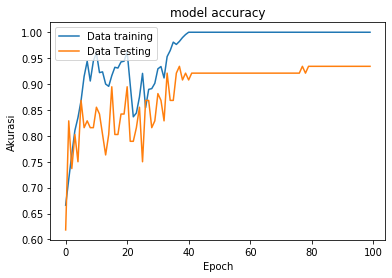

In [18]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

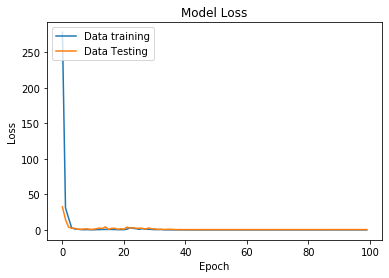

In [19]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

## CONFUSION MATRIX
Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya 

In [20]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [21]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[13  3]
 [ 2 58]]


## PRECISSION, RECALL, F1, SENSITIVITY, DAN AKURASI

In [22]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [23]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.8125
recall :  0.8666666666666667
F1 :  0.8387096774193549
sensitivity :  0.8666666666666667
akurasi :  0.9342105263157895
